In [3]:
import pandas as pd
df=pd.read_csv("C:/Users/Ndiaye/Desktop/00_Etudes/0_L3_bis/1_S1/Science des données 3/00-Projet_science_de_donnée\data.csv",sep=",")


In [4]:
df.head()

,identifiant,pays,score irc,rang par mortalites,deces_total,perte_PIB_total,rang_pertes_PPA,pertes_totales_PPA,nombre total d’habitants
0,0,Saudi Arabia,72.50,18,140,0.0001,119,1.229,33413660
1,1,Romania,61.50,102,1,0.6746,11,2797.884,19473936
2,2,Spain,66.33,47,22,0.0394,31,637.070,46796540
3,3,Slovenia,124.50,114,0,0.0250,135,0.000,2079976
4,4,South Sudan,117.33,114,0,0.0021,122,0.508,10975920


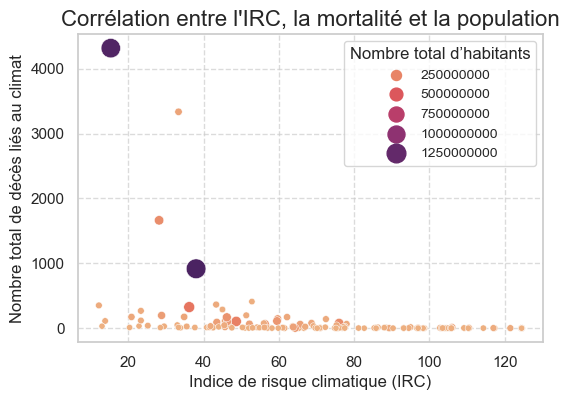

In [5]:
# ETUDE DE L'IMPACT DE L'IRC SUR LA MORTALITE  :
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des données à tracer
data_to_plot = df[['score irc', 'deces_total', 'nombre total d’habitants']]

# Définition du style de base de Seaborn
sns.set(style="whitegrid")
# Création du graphique avec la palette de couleurs
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(x='score irc', y='deces_total', hue='nombre total d’habitants',
                          data=data_to_plot, palette='flare', size='nombre total d’habitants', sizes=(20, 200))

plt.title('Corrélation entre l\'IRC, la mortalité et la population', fontsize=16)
plt.xlabel('Indice de risque climatique (IRC)', fontsize=12)
plt.ylabel('Nombre total de décès liés au climat', fontsize=12)

# Redimensionnement de la légende pour plus de lisibilité
scatter.legend(title='Nombre total d’habitants', fontsize='small', title_fontsize='12')

# Ajout de la grille pour une meilleure référence visuelle
plt.grid(True, linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


In [ ]:
!pip install geopandas matplotlib


In [11]:
!pip install geopandas matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt


In [12]:
# chargement du jeu de donnée "naturalearth_lowres" contenant des informations géographiques sur les limites des pays du monde.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\Ndiaye\AppData\Local\Temp\ipykernel_30136\860095771.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [13]:
# fusion de "naturalearth_lowres" avec notre jeu de données pour faire correspondre les nom de nos pays afin de les representer graphiquement
merged_data = world.merge(df, left_on='name', right_on='pays')




In [14]:
## Dans cette cellule on cherche juste a voir l'orthographe des pays contenus
#    dans 'naturalearth_lowres' pour en corriger certaines dans notre jeu de données

# Affichage de la liste des noms de tous les pays
liste_pays = world['name'].tolist()
print(liste_pays)


['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States of America', 'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'Burundi', 'Israel', 'Lebanon', 'Madagascar', 'Palestine', 'Gambia', '

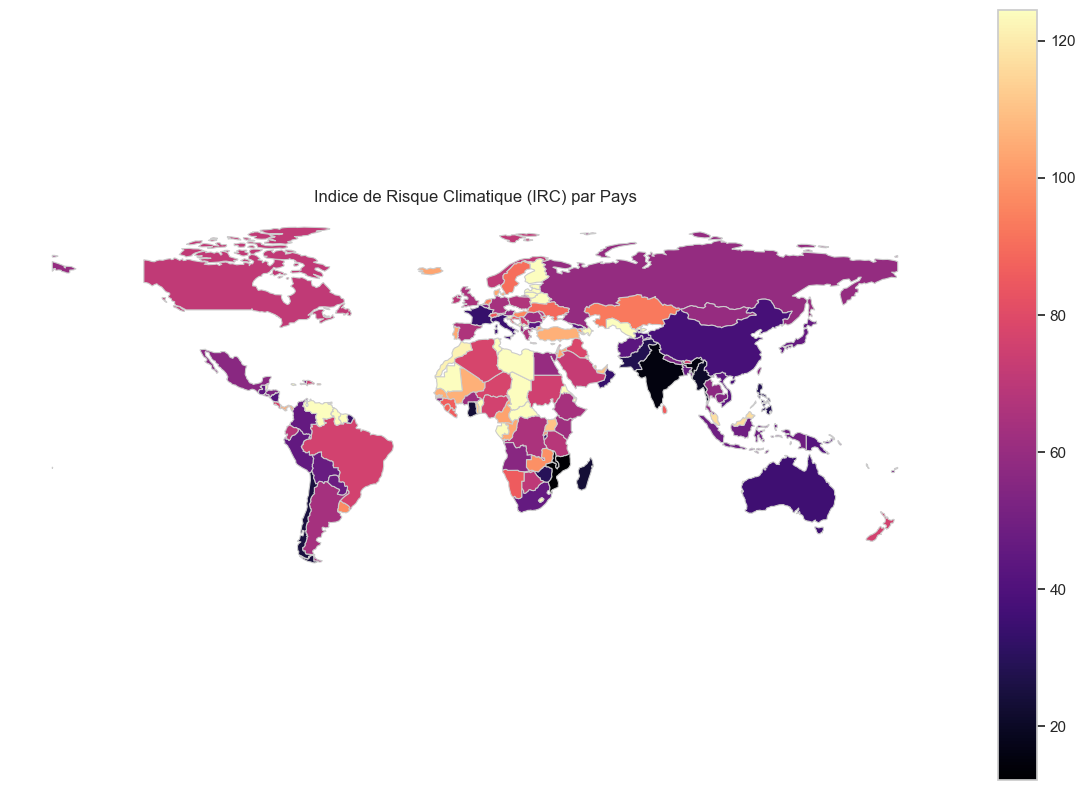

In [17]:
# REPRESENTATION DE L'IRC PAR PAYS
# Création d'une carte du monde
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


merged_data.plot(column='score irc', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajout d'une legende
plt.title('Indice de Risque Climatique (IRC) par Pays')
ax.set_axis_off()

plt.show()


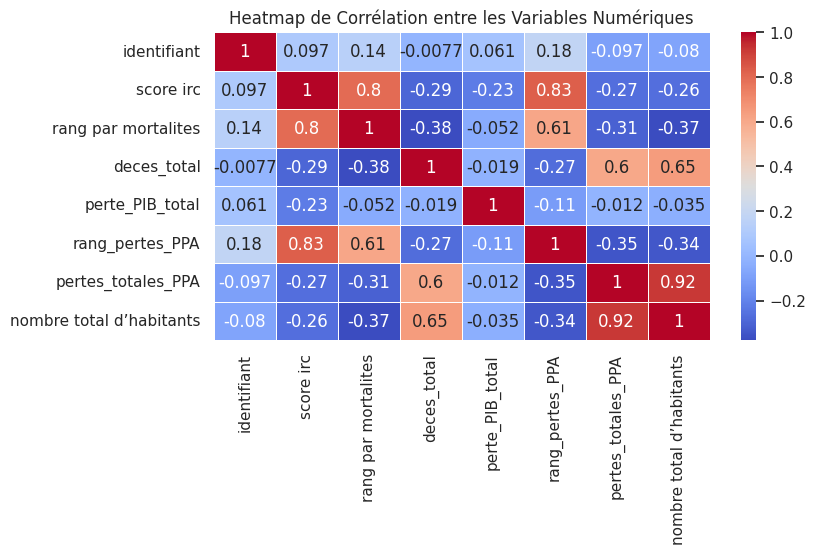

In [ ]:
# ETUDE DE LA CORRELATION ENTRE LES VARIABLES NUMERIQUES

# Selection des données numeriques de notre jeu de données
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Céation de la heatmap de corrélation
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap de Corrélation entre les Variables Numériques')
plt.show()


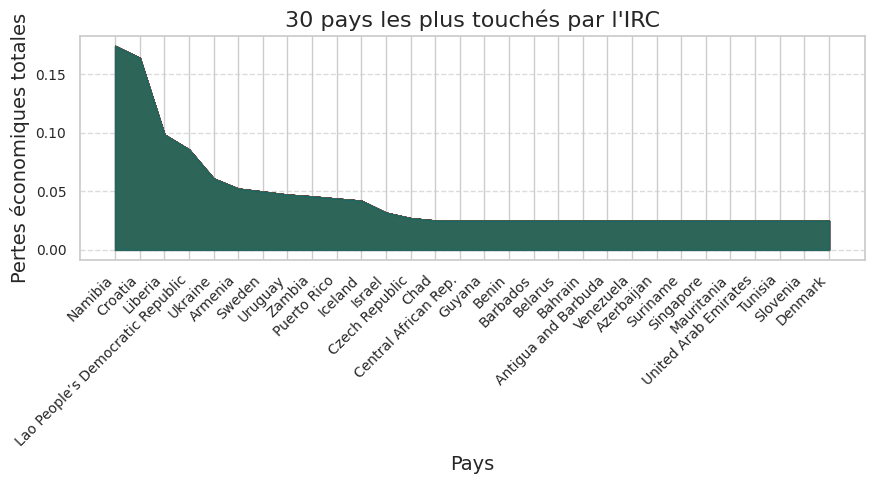

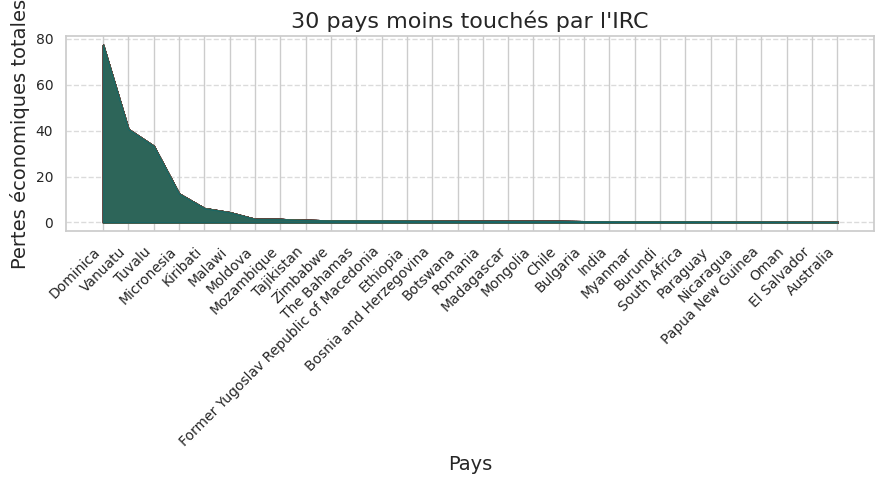

In [ ]:
# REPRESENTATION DES PERTES ECONOMIQUES DES 30 PAYS LES PLUS ET LES MOINS TOUCHES

# Définition d'un seuil pour déterminer les pays les plus et moins touchés
seuil_irc = df['score irc'].median()

# Division des données en deux parties
pays_plus_touche = df[df['score irc'] > seuil_irc].nlargest(30, 'perte_PIB_total')
pays_moins_touche = df[df['score irc'] <= seuil_irc].nlargest(30, 'perte_PIB_total')

# Création des diagrammes en aires empilées pour les deux groupes de pays
def plot_stacked_area(data, title):
    # Utilisation de la palette de couleurs 'muted' de Seaborn
    colors = sns.color_palette('dark', n_colors=len(data))

    data.sort_values('perte_PIB_total', ascending=False, inplace=True)
    fig, ax = plt.subplots(figsize=(9, 5))

    # Utilisation de fill_between pour créer un graphique en aires empilées
    for i, pays in enumerate(data['pays']):
        ax.fill_between(data['pays'], 0, data['perte_PIB_total'], label=pays, color=colors[i], alpha=0.7)

    ax.set_xlabel('Pays', fontsize=14)
    ax.set_ylabel('Pertes économiques totales', fontsize=14)
    ax.set_title(title, fontsize=16)

    plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustement de l'angle des étiquettes
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Personnalisation de la grille
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

# Création des graphiques pour les deux groupes
plot_stacked_area(pays_plus_touche, '30 pays les plus touchés par l\'IRC')
plot_stacked_area(pays_moins_touche, '30 pays moins touchés par l\'IRC')


In [10]:
import plotly.express as px

# Création du graphique avec Plotly
fig = px.scatter(df, x='rang par mortalites', y='deces_total', trendline='ols', hover_name='pays')

# Mise en forme du graphique
fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(color='red', width=2)))
fig.update_layout(title='Relation entre le rang par mortalités et le nombre de décès',
                  xaxis_title='Rang par mortalités',
                  yaxis_title='Nombre de décès',
                  showlegend=False, 
                  template='plotly_dark',  # Choisir un modèle de thème
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'))

# Affichage du graphique
fig.show()

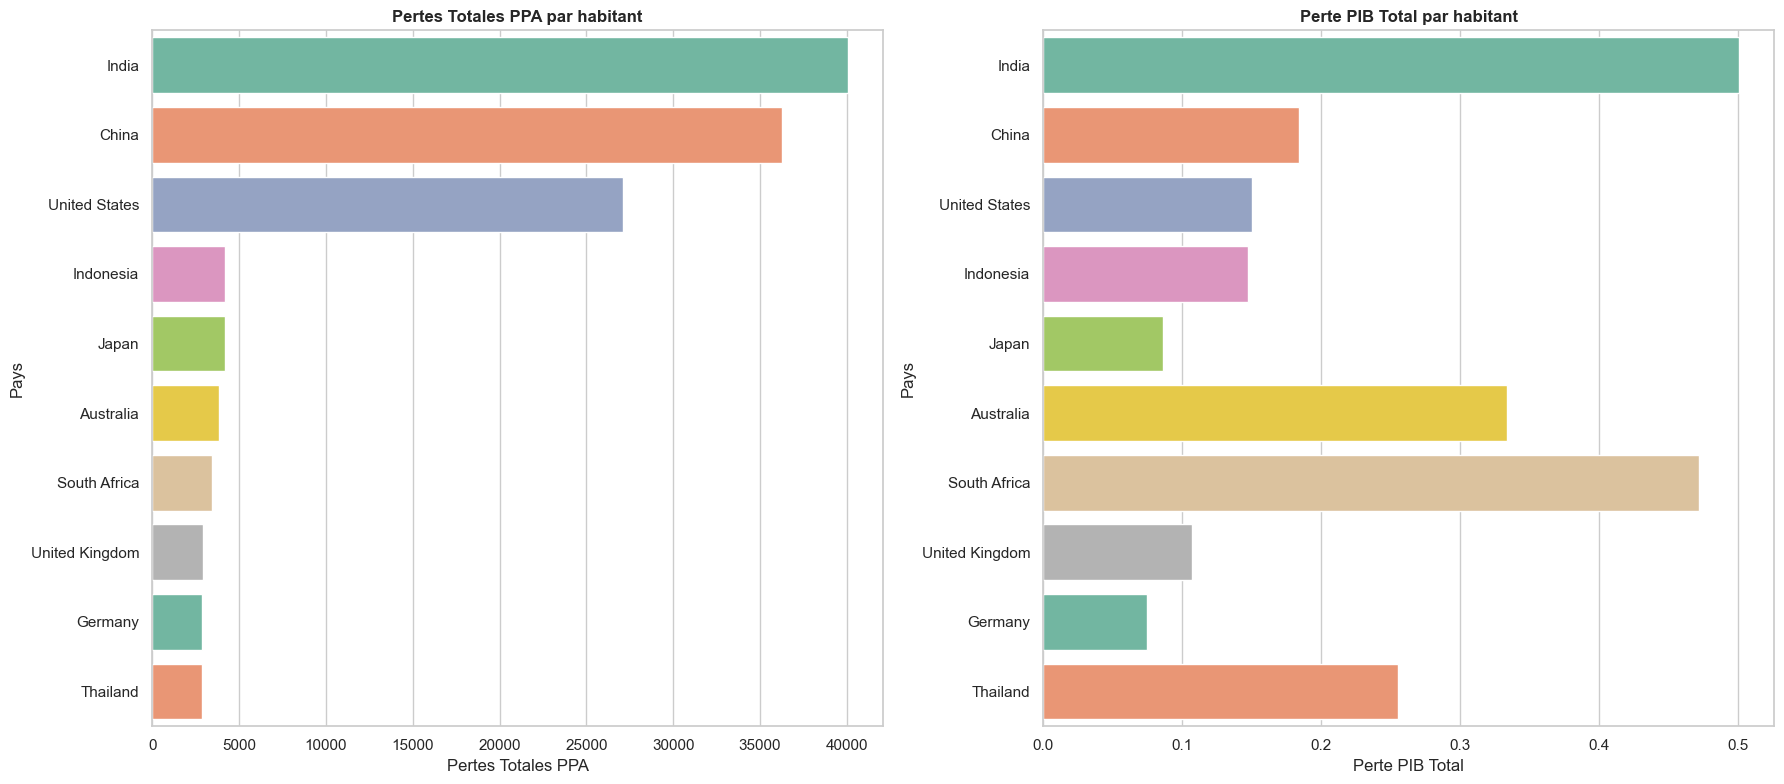

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tri du DataFrame par 'pertes_totales_PPA'
tri = df.sort_values(by='pertes_totales_PPA', ascending=False)

# Sélection des 10 premiers pays avec les plus grandes pertes économiques par habitant ajustées en PPA
top_10_pays_pertes_ppa = tri.head(10)

# Création du multigraphe
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Graphique 1 : pertes_totales_PPA
sns.barplot(x='pertes_totales_PPA', y='pays', data=top_10_pays_pertes_ppa, ax=axes[0], palette='Set2')
axes[0].set_title('Pertes Totales PPA par habitant',fontweight="bold")
axes[0].set_xlabel('Pertes Totales PPA')
axes[0].set_ylabel('Pays')

# Graphique 2 : perte_PIB_total
sns.barplot(x='perte_PIB_total', y='pays', data=top_10_pays_pertes_ppa, ax=axes[1], palette='Set2')
axes[1].set_title('Perte PIB Total par habitant',fontweight="bold")
axes[1].set_xlabel('Perte PIB Total')
axes[1].set_ylabel('Pays')

plt.tight_layout()
plt.show()
